In [ ]:
import pandas as pd

customers_df = pd.read_csv('/content/Customers - Customers.csv')
products_df = pd.read_csv('/content/Products - Products.csv')
transactions_df = pd.read_csv('/content/Transactions - Transactions.csv')

print(customers_df.head())
print(products_df.head())
print(transactions_df.head())


  Customer ID        CustomerName         Region  SignupDate
0       C0001    Lawrence Carroll  South America  10/07/2022
1       C0002      Elizabeth Lutz           Asia  13/02/2022
2       C0003      Michael Rivera  South America  07/03/2024
3       C0004  Kathleen Rodriguez  South America  09/10/2022
4       C0005         Laura Weber           Asia  15/08/2022
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  25/08/2024 12:38:23         1   
1        T00112      C0146      P067  27/05/2024 22:23:54         1   
2        T00166      C0127      P067  25/04/2024 07:38:55         1   
3 

In [ ]:
customers_df.info()
products_df.info()
transactions_df.info()

print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [ ]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], format='%d/%m/%Y')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], format='%d/%m/%Y %H:%M:%S')
transactions_df['TotalValue'] = pd.to_numeric(transactions_df['TotalValue'], errors='coerce')

In [ ]:
import pandas as pd


total_customers = customers_df['CustomerID'].nunique()
most_popular_region = customers_df['Region'].value_counts().idxmax()
region_order_count = customers_df['Region'].value_counts().max()
most_active_customer = transactions_df.groupby('CustomerID')['TransactionID'].count().idxmax()
most_active_customer_orders = transactions_df.groupby('CustomerID')['TransactionID'].count().max()
first_signup_date = customers_df['SignupDate'].min()
recent_signups = customers_df[customers_df['SignupDate'] > '2024-12-01'].shape[0]

customer_summary = f"""
Customer Data Summary:
------------------------
- Total Customers: {total_customers}
- Most Popular Region: {most_popular_region} (with {region_order_count} orders)
- Most Active Customer: Customer {most_active_customer} (with {most_active_customer_orders} orders)
- First Signup Date: {first_signup_date}
- New Signups in December 2024: {recent_signups}
"""

total_products = products_df['ProductID'].nunique()
highest_price_product = products_df.loc[products_df['Price'].idxmax()]
most_ordered_product = transactions_df.groupby('ProductID')['Quantity'].sum().idxmax()
most_ordered_product_name = products_df[products_df['ProductID'] == most_ordered_product]['ProductName'].values[0]
total_revenue = transactions_df['TotalValue'].sum()
top_selling_category = products_df.groupby('Category')['Price'].sum().idxmax()

product_summary = f"""
Product Data Summary:
-----------------------
- Total Products: {total_products}
- Highest Priced Product: {highest_price_product['ProductName']} (${highest_price_product['Price']:.2f})
- Most Ordered Product: {most_ordered_product_name} (with {transactions_df[transactions_df['ProductID'] == most_ordered_product]['Quantity'].sum()} orders)
- Total Revenue: ${total_revenue:.2f}
- Top Selling Category: {top_selling_category}
"""

total_transactions = transactions_df['TransactionID'].nunique()
highest_transaction_month = transactions_df.groupby(transactions_df['YearMonth'])['TransactionID'].count().idxmax()
highest_transaction_count = transactions_df.groupby(transactions_df['YearMonth'])['TransactionID'].count().max()
highest_value_transaction = transactions_df['TotalValue'].max()
average_transaction_value = transactions_df['TotalValue'].mean()

transaction_summary = f"""
Transaction Data Summary:
---------------------------
- Total Transactions: {total_transactions}
- Busiest Month: {highest_transaction_month} (with {highest_transaction_count} transactions)
- Highest Transaction Value: ${highest_value_transaction:.2f}
- Average Transaction Value: ${average_transaction_value:.2f}
"""

full_summary = customer_summary + product_summary + transaction_summary

print(full_summary)



Customer Data Summary:
------------------------
- Total Customers: 200
- Most Popular Region: South America (with 59 orders)
- Most Active Customer: Customer C0109 (with 11 orders)
- First Signup Date: 2022-01-22 00:00:00
- New Signups in December 2024: 1

Product Data Summary:
-----------------------
- Total Products: 100
- Highest Priced Product: TechPro Textbook ($497.76)
- Most Ordered Product: SoundWave Cookbook (with 46 orders)
- Total Revenue: $332669.30
- Top Selling Category: Books

Transaction Data Summary:
---------------------------
- Total Transactions: 1000
- Busiest Month: 2024-01 (with 107 transactions)
- Highest Transaction Value: $995.52
- Average Transaction Value: $447.74



In [ ]:
import pandas as pd

customers_df = pd.read_csv('/content/Updated_Customers.csv')
products_df = pd.read_csv('/content/Products - Products.csv')
transactions_df = pd.read_csv('/content/Transactions - Transactions.csv')

customer_transactions_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

full_data_df = pd.merge(customer_transactions_df, products_df, on='ProductID', how='left')

full_data_df['TransactionDate'] = pd.to_datetime(full_data_df['TransactionDate'], errors='coerce')
print("Missing Values Before Cleaning:")
print(full_data_df.isnull().sum())

full_data_df.drop(columns=['Price_x'], inplace=True)
full_data_df.rename(columns={'Price_y': 'Price'}, inplace=True)

full_data_df.dropna(inplace=True)

full_data_df['Price'] = pd.to_numeric(full_data_df['Price'], errors='coerce')
full_data_df['Quantity'] = pd.to_numeric(full_data_df['Quantity'], errors='coerce')
full_data_df['TotalValue'] = pd.to_numeric(full_data_df['TotalValue'], errors='coerce')

print("Data Types After Cleaning:")
print(full_data_df.dtypes)
print("Missing Values After Cleaning:")
print(full_data_df.isnull().sum())
full_data_df.to_csv('Cleaned_Merged_Customer_Product_Transactions.csv', index=False)

print("Cleaned Data Sample:")
print(full_data_df.head())


In [ ]:
combined_df = pd.read_csv('/content/Cleaned_Merged_Customer_Product_Transactions.csv')
combined_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,03/12/2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,04/09/2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,04/04/2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,11/04/2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,15/03/2022,ComfortLiving Bluetooth Speaker,Electronics,300.68


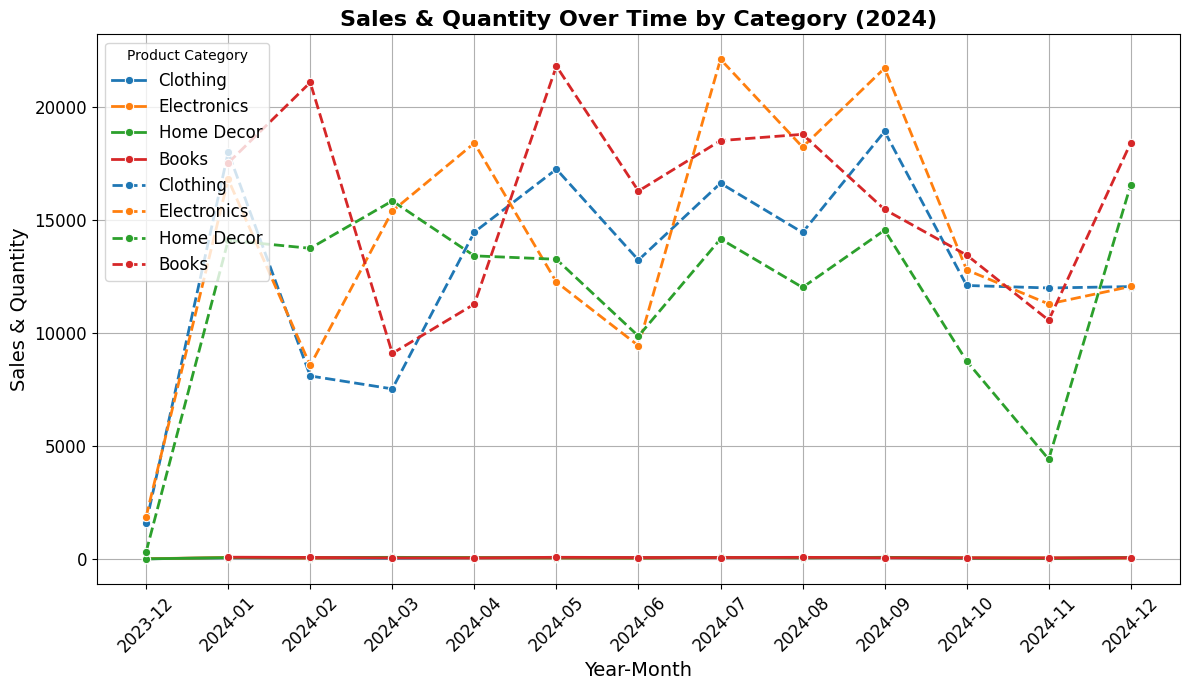

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
combined_df['TransactionDate'] = pd.to_datetime(combined_df['TransactionDate'])

combined_df['YearMonth'] = combined_df['TransactionDate'].dt.to_period('M').astype(str)

combined_df['TotalValue'] = combined_df['Quantity'] * combined_df['Price']

category_sales_time = combined_df.groupby(['YearMonth', 'Category']).agg(
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalValue', 'sum')
).reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='YearMonth', y='total_quantity', hue='Category', data=category_sales_time, marker='o', linewidth=2)
sns.lineplot(x='YearMonth', y='total_sales', hue='Category', data=category_sales_time, marker='o', linewidth=2, linestyle='--')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sales & Quantity', fontsize=14)
plt.title('Sales & Quantity Over Time by Category (2024)', fontsize=16, weight='bold')
plt.legend(title='Product Category', loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-62-bb70ba3896b5>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_sales.index, rotation=45, ha='right', fontsize=12)


<Figure size 1200x700 with 0 Axes>

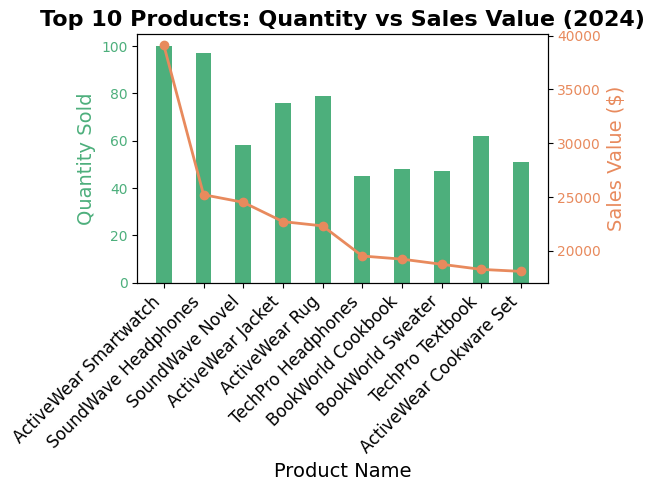

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
combined_df['TotalValue'] = combined_df['Quantity'] * combined_df['Price']

product_sales = combined_df.groupby('ProductName').agg(
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalValue', 'sum')
).sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12, 7))

fig, ax1 = plt.subplots()

color = '#4daf7c'
ax1.set_xlabel('Product Name', fontsize=14)
ax1.set_ylabel('Quantity Sold', color=color, fontsize=14)
ax1.bar(product_sales.index, product_sales['total_quantity'], color=color, width=0.4, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(product_sales.index, rotation=45, ha='right', fontsize=12)

ax2 = ax1.twinx()
color = '#e88a5d'
ax2.set_ylabel('Sales Value ($)', color=color, fontsize=14)
ax2.plot(product_sales.index, product_sales['total_sales'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Top 10 Products: Quantity vs Sales Value (2024)', fontsize=16, weight='bold')
plt.show()


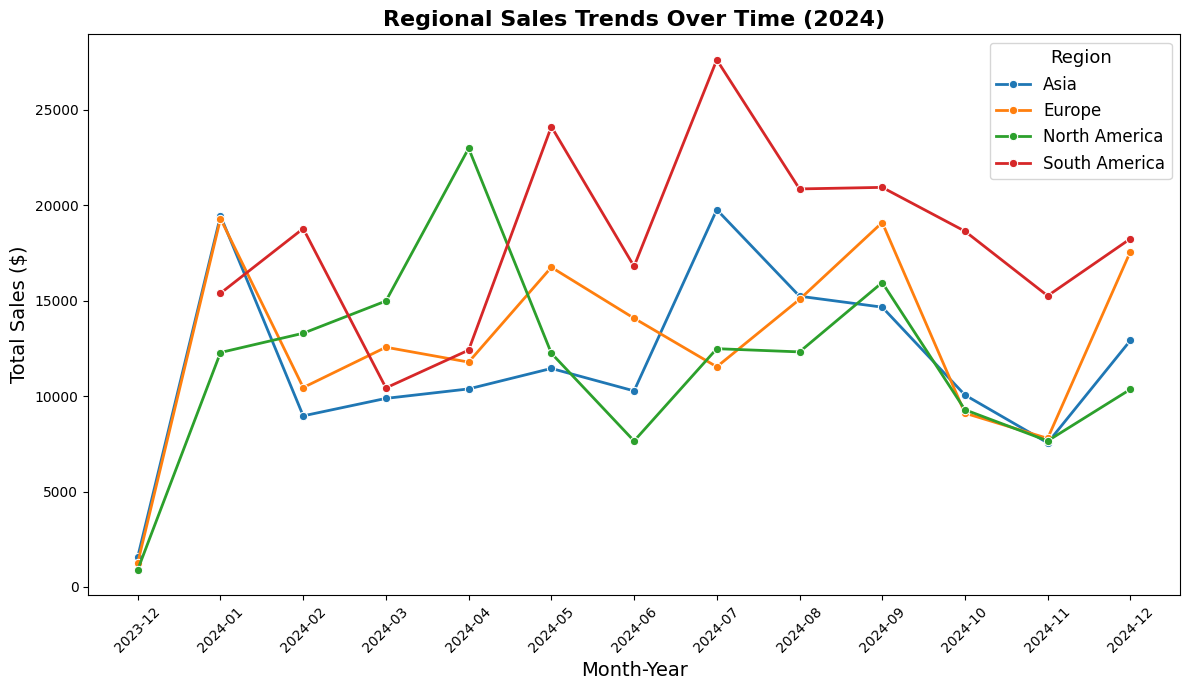

In [64]:
import seaborn as sns

combined_df['YearMonth'] = pd.to_datetime(combined_df['TransactionDate']).dt.to_period('M').astype(str)
region_sales_time = combined_df.groupby(['Region', 'YearMonth']).agg(
    total_sales=('TotalValue', 'sum')
).reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='YearMonth', y='total_sales', hue='Region', data=region_sales_time, marker='o', linewidth=2)

plt.title('Regional Sales Trends Over Time (2024)', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Region', title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.show()


<ipython-input-65-3936fabaaa3f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='ProductName', data=top_products, palette='viridis', orient='h')


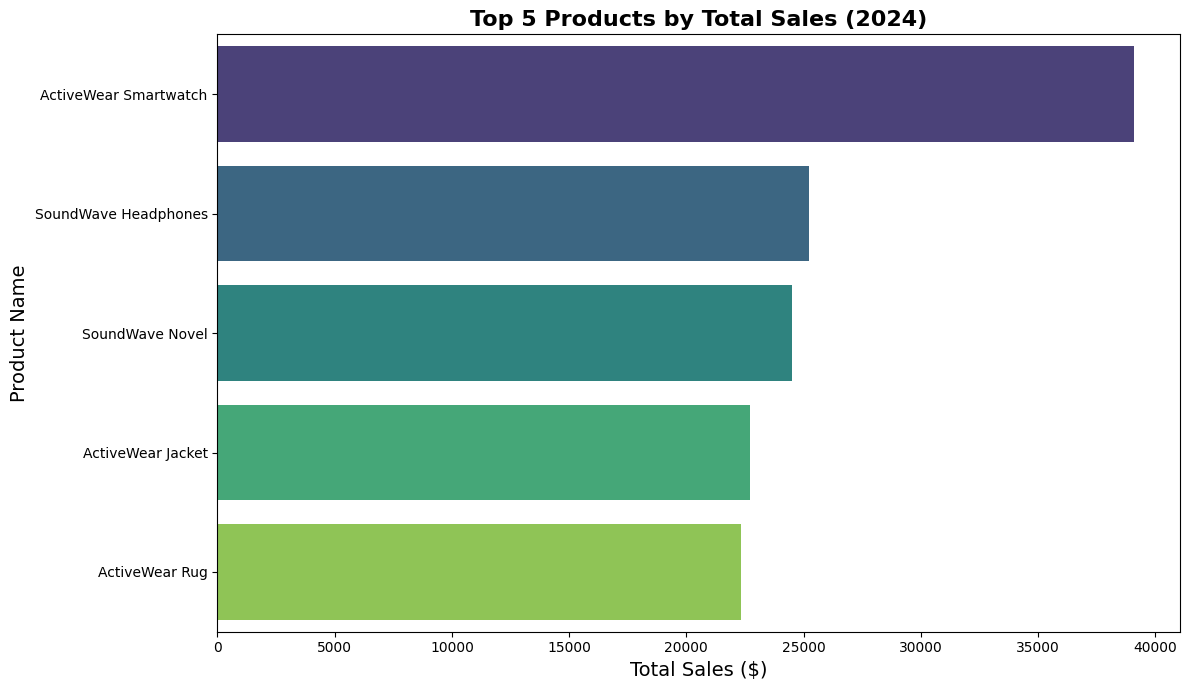

In [65]:
product_sales = combined_df.groupby('ProductName').agg(
    total_sales=('TotalValue', 'sum')
).reset_index()
top_products = product_sales.sort_values(by='total_sales', ascending=False).head(5)

plt.figure(figsize=(12, 7))
sns.barplot(x='total_sales', y='ProductName', data=top_products, palette='viridis', orient='h')

plt.title('Top 5 Products by Total Sales (2024)', fontsize=16, weight='bold')
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.tight_layout()
plt.show()


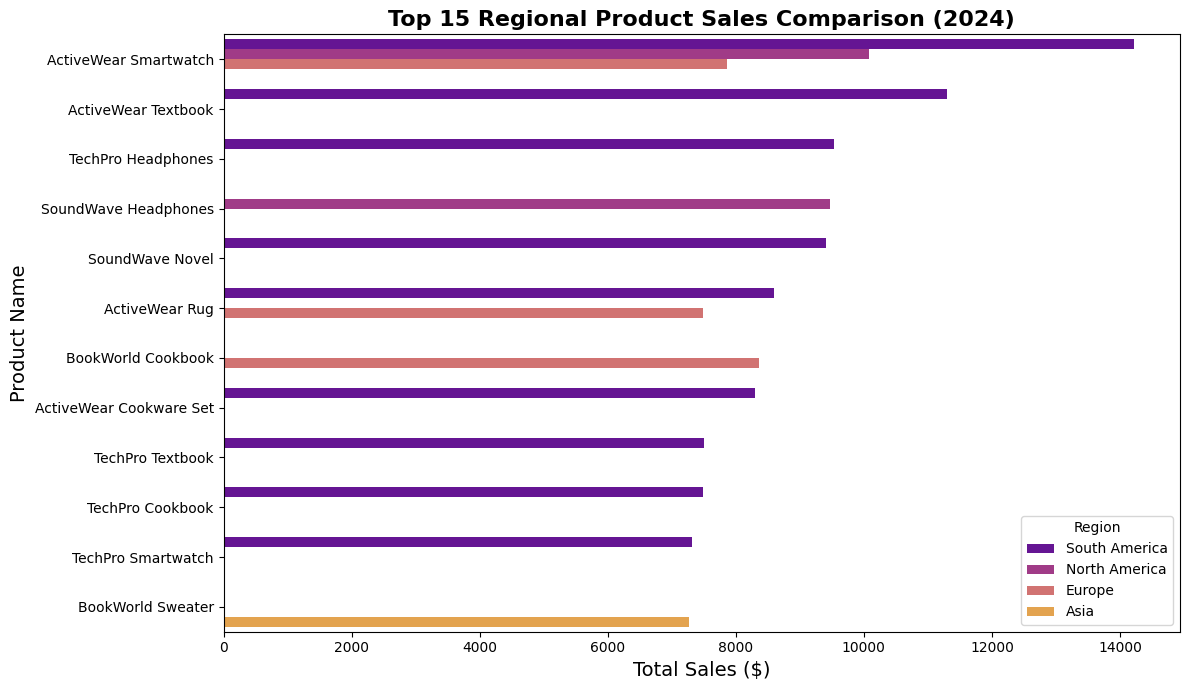

In [67]:
top_15_region_product_sales = region_product_sales.sort_values(by='total_sales', ascending=False).head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x='total_sales', y='ProductName', hue='Region', data=top_15_region_product_sales, palette='plasma', orient='h')

plt.title('Top 15 Regional Product Sales Comparison (2024)', fontsize=16, weight='bold')
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-69-2b4f25e6e848>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Customer_Info', data=top_15_customers, palette='viridis', orient='h')


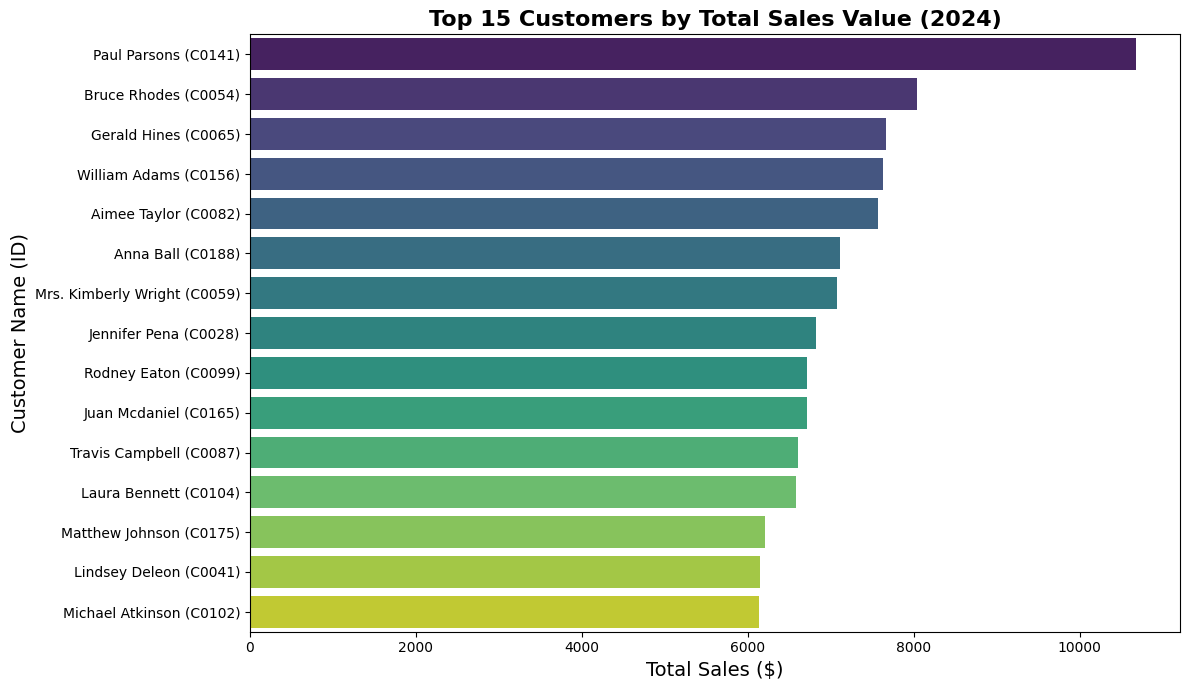

In [69]:
customer_sales_data = combined_df.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

customer_sales_data = customer_sales_data.merge(combined_df[['CustomerID', 'CustomerName']].drop_duplicates(), on='CustomerID', how='left')

top_15_customers = customer_sales_data.sort_values(by='TotalValue', ascending=False).head(15)

top_15_customers['Customer_Info'] = top_15_customers['CustomerName'] + ' (' + top_15_customers['CustomerID'].astype(str) + ')'

plt.figure(figsize=(12, 7))
sns.barplot(x='TotalValue', y='Customer_Info', data=top_15_customers, palette='viridis', orient='h')

plt.title('Top 15 Customers by Total Sales Value (2024)', fontsize=16, weight='bold')
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Customer Name (ID)', fontsize=14)
plt.tight_layout()
plt.show()


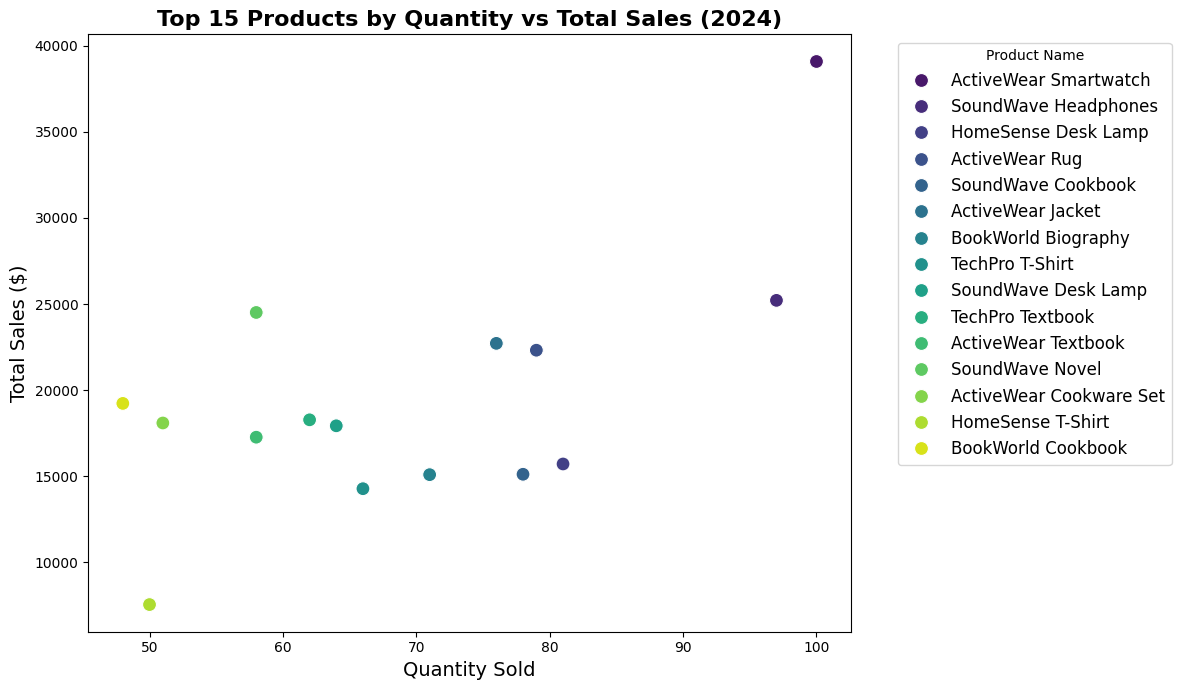

In [71]:
product_sales_data = combined_df.groupby('ProductName').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

top_15_products_quantity = product_sales_data.sort_values(by='Quantity', ascending=False).head(15)

plt.figure(figsize=(12, 7))
sns.scatterplot(x='Quantity', y='TotalValue', data=top_15_products_quantity, hue='ProductName', palette='viridis', s=100)

plt.title('Top 15 Products by Quantity vs Total Sales (2024)', fontsize=16, weight='bold')
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-72-afd83d80a98a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=top_5_regions_sales, palette='Blues_d')


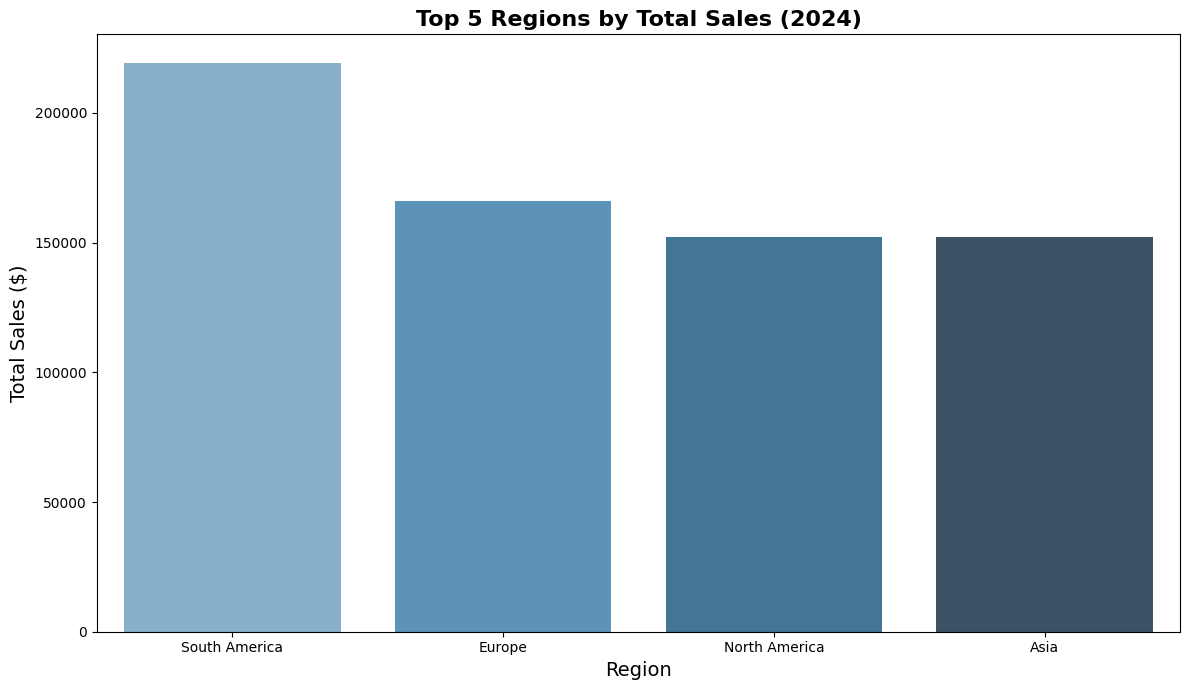

In [72]:
region_sales_data = combined_df.groupby('Region').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

top_5_regions_sales = region_sales_data.sort_values(by='TotalValue', ascending=False).head(5)

plt.figure(figsize=(12, 7))
sns.barplot(x='Region', y='TotalValue', data=top_5_regions_sales, palette='Blues_d')

plt.title('Top 5 Regions by Total Sales (2024)', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-74-afcec2ea39ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='TotalValue', data=top_5_categories_sales, palette='Purples_d')


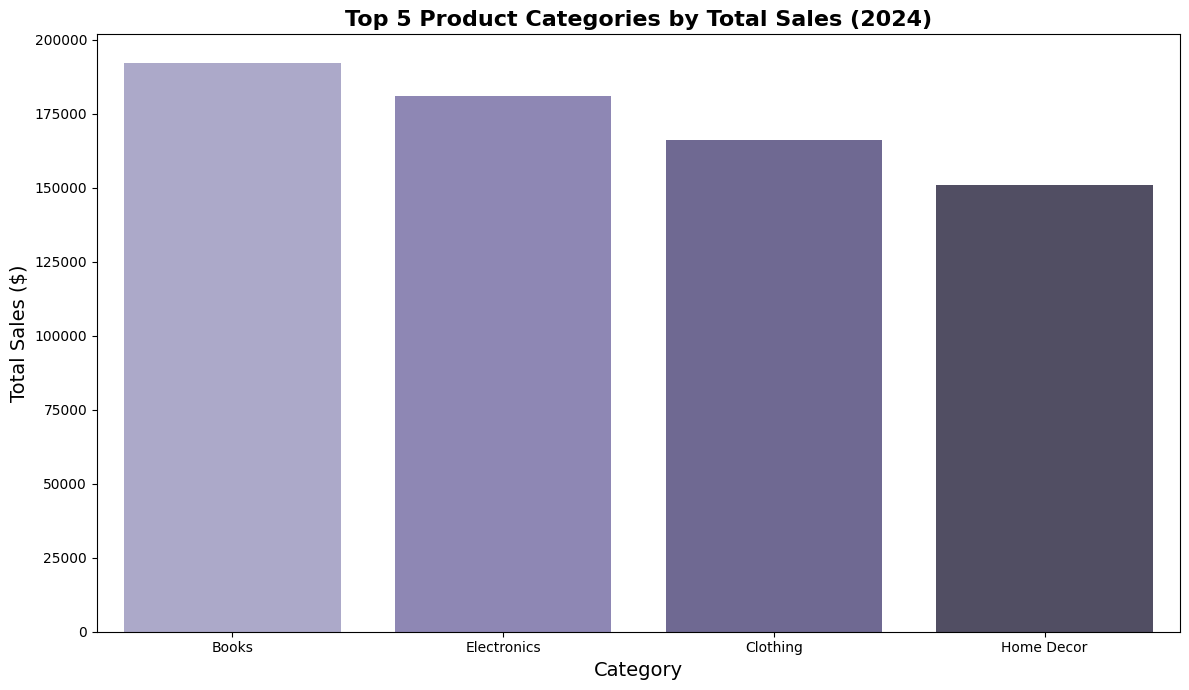

In [74]:
category_sales_data = combined_df.groupby('Category').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

top_5_categories_sales = category_sales_data.sort_values(by='TotalValue', ascending=False).head(5)

plt.figure(figsize=(12, 7))
sns.barplot(x='Category', y='TotalValue', data=top_5_categories_sales, palette='Purples_d')

plt.title('Top 5 Product Categories by Total Sales (2024)', fontsize=16, weight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.tight_layout()
plt.show()
